

<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> EDA and Data Modelling </h1>


```
# This is formatted as code
```



<ul>
<li><p style="font-family:verdana;">
We are going to do EDA and Predict whether a person's income is above 50k or below 50k
</p></li>
<li><p style="font-family:verdana;">
Label coulumn is 'income'
</p></li>
<li><p style="font-family:verdana;">
"Adult census income dataset" from Kaggle can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li>

<li><p style="font-family:verdana;">
The data consists of 15 column and 32560 rows.
</p></li>  
</ul>

</div>

### Steps We Are Going to Follow
1. Descriptive Analysis
2. Exploratory Data Analysis
3. Data Preprocessing and Feature Engineering
4. Data Modelling
5. Evaluation of Model

##Importing Libraries and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
##Loading Dataset
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult (1).csv


In [3]:
dataset = pd.read_csv('adult.csv')

##Descriptive Analysis

In [4]:
#Top five rows of dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#Bottom 5 rows of dataset
dataset.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [7]:
# features data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#statistical
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Check missing values
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
# in percantege
round((dataset.isnull().sum() / dataset.shape[0]) * 100,2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [11]:
# Checking '?' in dataset
dataset.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
# in percantege
round((dataset.isin(['?']).sum()/dataset.shape[0])*100,2).astype(str) + '%'

age                0.0%
workclass         5.64%
fnlwgt             0.0%
education          0.0%
education.num      0.0%
marital.status     0.0%
occupation        5.66%
relationship       0.0%
race               0.0%
sex                0.0%
capital.gain       0.0%
capital.loss       0.0%
hours.per.week     0.0%
native.country    1.79%
income             0.0%
dtype: object

In [13]:
# counts of label column
dataset['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [14]:
# in percantege
round(dataset['income'].value_counts(normalize=True)*100,2).astype(str) + '%'

<=50K    75.92%
>50K     24.08%
Name: income, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

1. Features Don't have null values but missing values are present in the form of '?' in 'workclass', 'occupation', 'native.country' Columns

2. unbalanced dataset, dependent feature 'income' contains 75.92% values of income less than 50k and 24.08% values of income more than 50k.

# Exploratory Data Analysis (EDA)

###Univariate Analysis

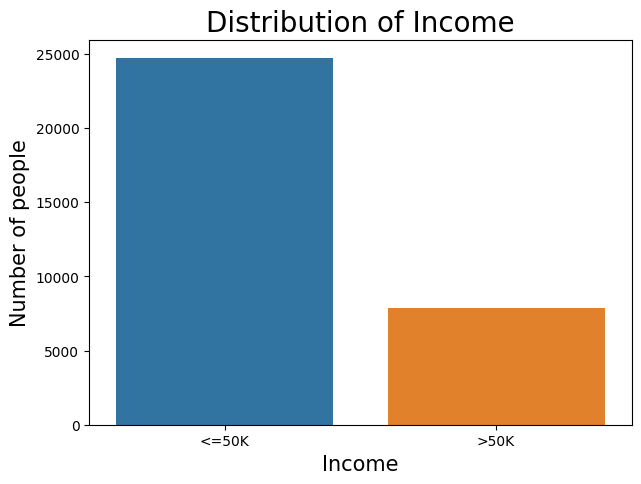

In [15]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x =income.index, y= income.values)
plt.title('Distribution of Income', fontdict={ 'fontsize': 20, })
plt.xlabel('Income',fontdict={'fontsize': 15})
plt.ylabel('Number of people',fontdict={'fontsize': 15})
plt.show()

Text(0, 0.5, 'Number of people')

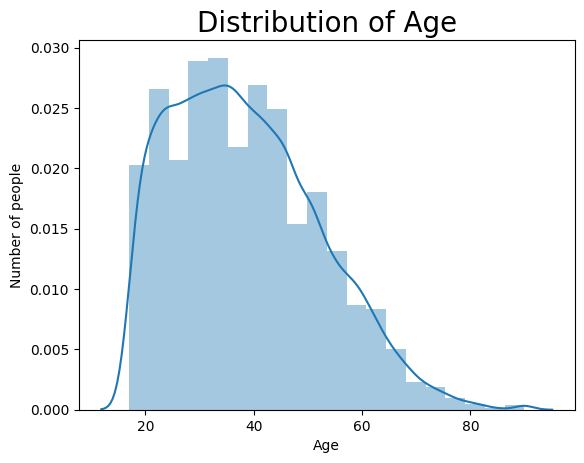

In [16]:
# distribution plot for 'Age'
sns.distplot(dataset['age'], bins = 20)
plt.title('Distribution of Age', fontdict={'fontsize': 20, })
plt.xlabel('Age')
plt.ylabel('Number of people')

Text(0, 0.5, 'Education')

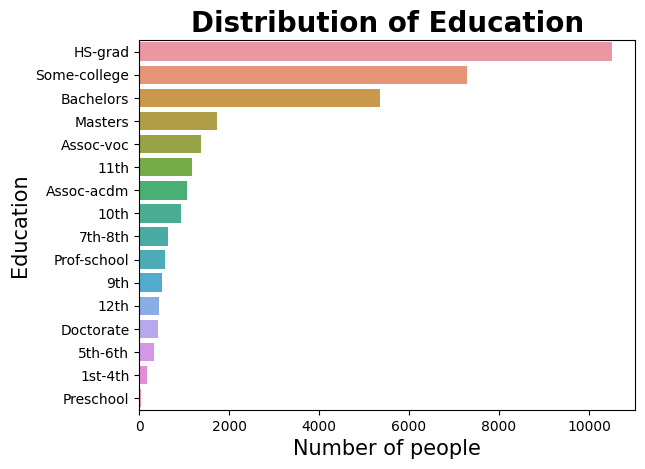

In [17]:
# barplot for 'Education'

education = dataset['education'].value_counts()
sns.barplot(x=education.values, y= education.index)

plt.title('Distribution of Education', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={'fontsize': 15})
plt.ylabel('Education', fontdict={ 'fontsize': 15})


Text(0, 0.5, 'Number of people')

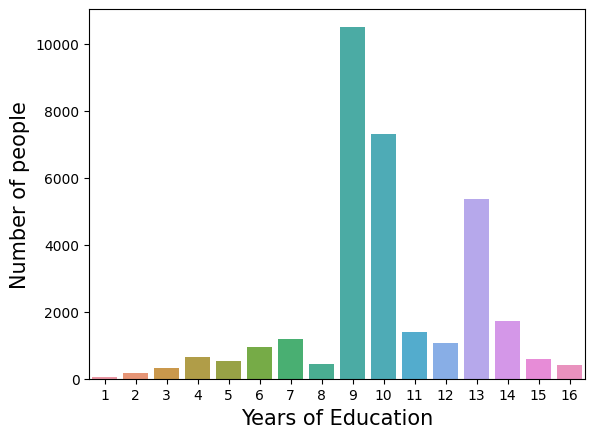

In [18]:
#  barplot for 'Years of Education'
edu_number = dataset['education.num'].value_counts()
sns.barplot(x=edu_number.index,y=edu_number.values)

plt.xlabel('Years of Education', fontdict={'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontsize': 15})


(-1.209292782928818,
 1.1719532275887679,
 -1.2811902630905088,
 1.108623946546758)

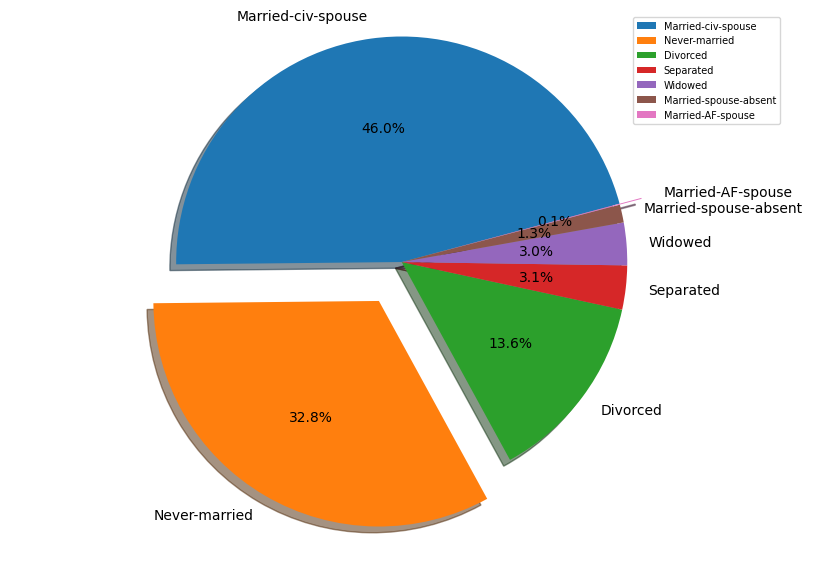

In [19]:
# pie chart for 'Marital status'
ms = dataset['marital.status'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(
    ms.values,
    labels = ms.index,
    shadow=True,
    explode=(0.0, 0.20, 0, 0, 0, 0, 0.10),
    startangle=15,
    autopct='%1.1f%%'
    )

plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')


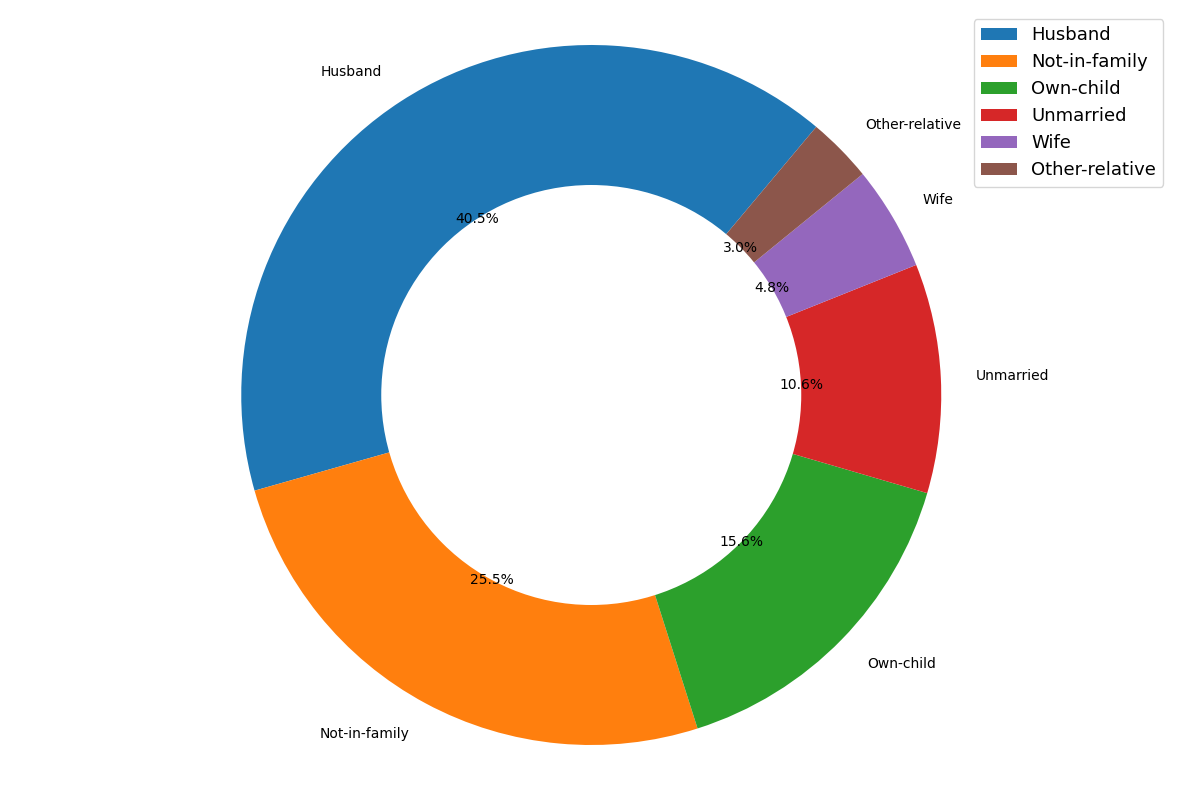

In [20]:
# donut chart for 'Relationship'
relation = dataset['relationship'].value_counts()


plt.figure(figsize=(15, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.6, fc='white')

plt.gcf().gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend(prop={'size': 13})
plt.show()

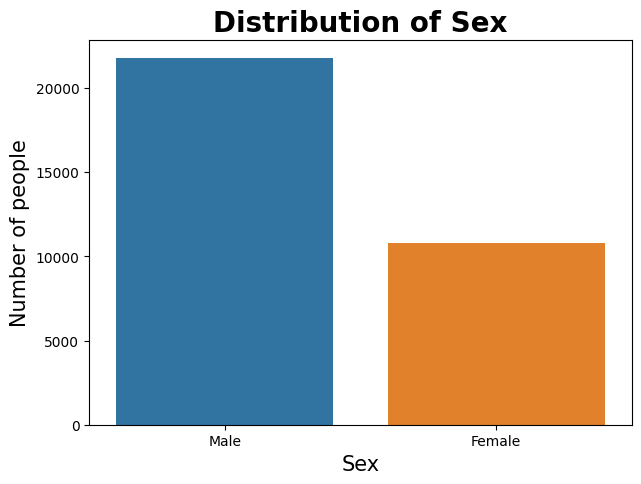

In [21]:
#  barplot for 'Sex'
sex = dataset['sex'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x = sex.index, y=sex.values)

plt.title('Distribution of Sex', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={ 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontsize': 15})


plt.show()

Text(0, 0.5, 'Number of people')

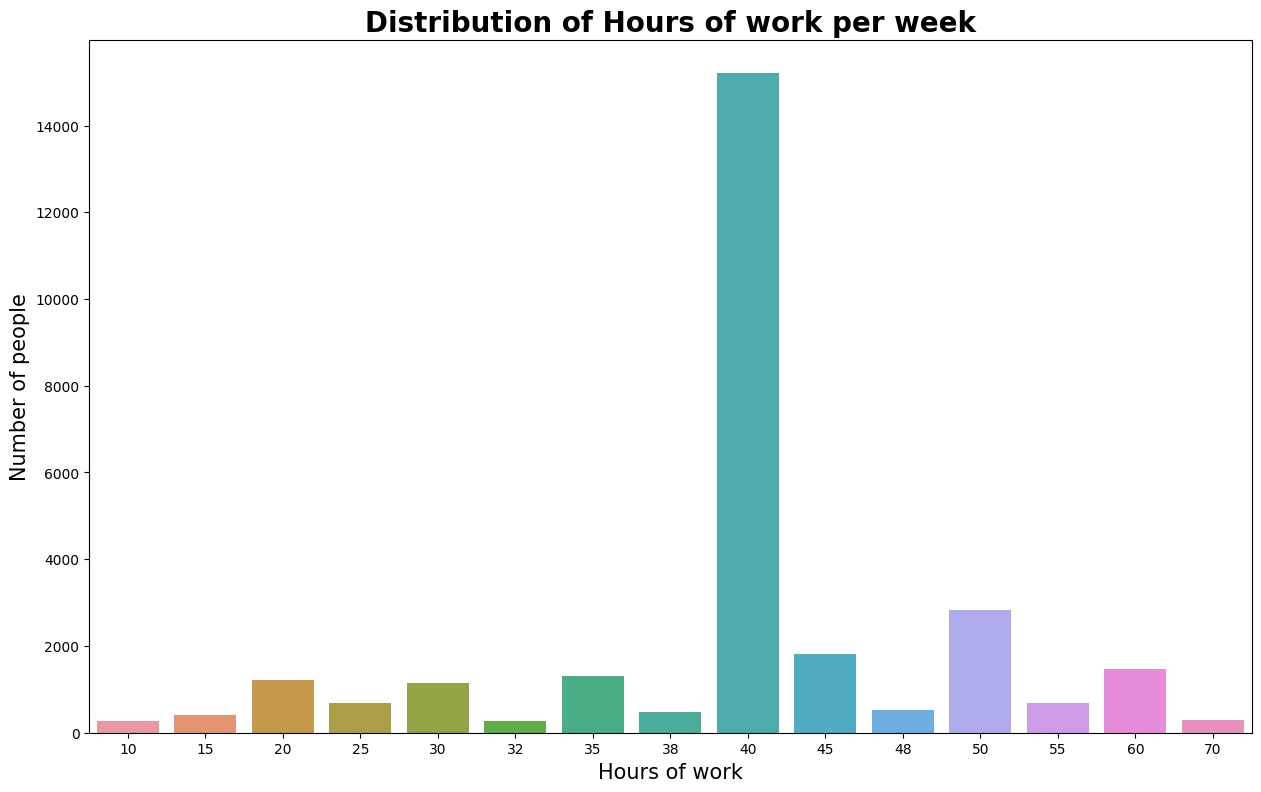

In [22]:
# barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(15)

plt.figure(figsize=(15, 9))
sns.barplot(x =hours.index, y= hours.values)

plt.title('Distribution of Hours of work per week', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontsize': 15})

### Bivariate Analysis

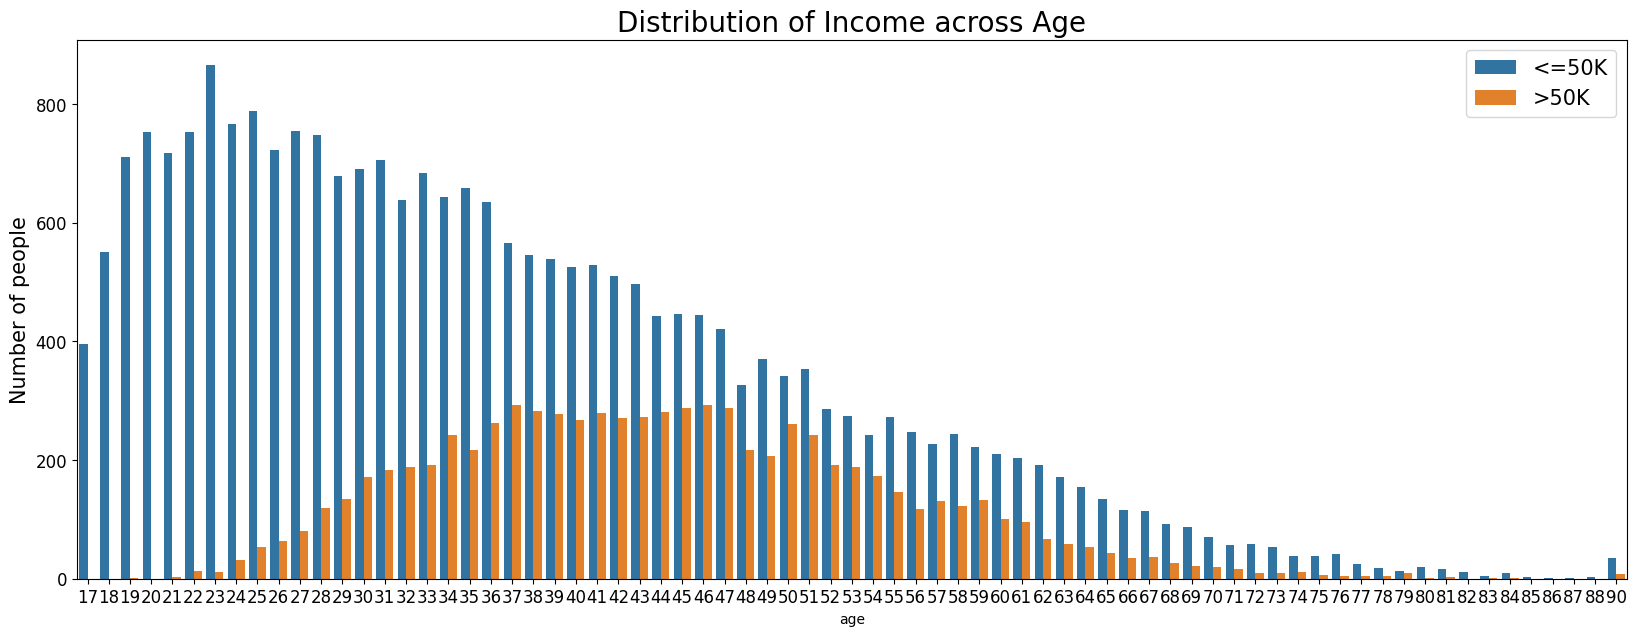

In [23]:
# countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['age'], hue=dataset['income'])

plt.title('Distribution of Income across Age', fontdict={'fontsize': 20,})
plt.ylabel('Number of people', fontdict={'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})


In [24]:
# countplot of income across education


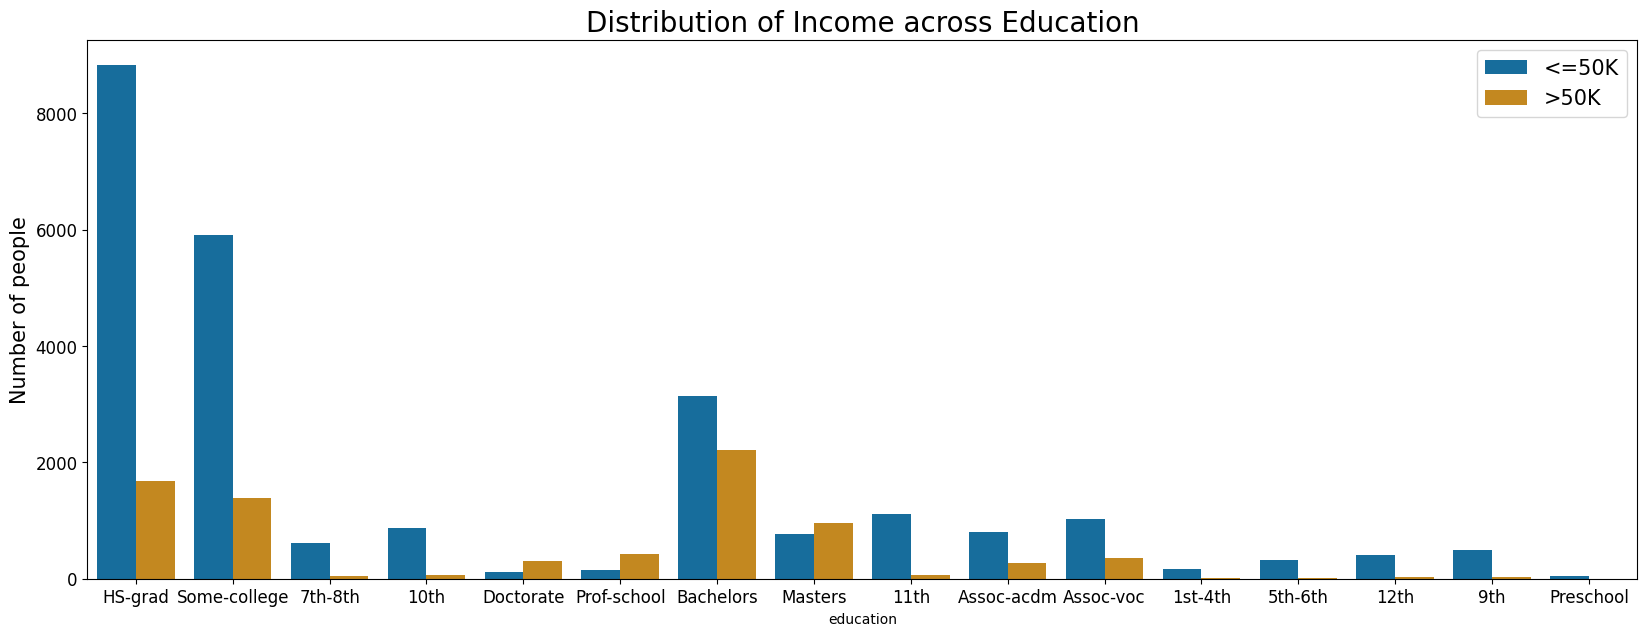

In [25]:
plt.figure(figsize=(20, 7))
sns.countplot(x =dataset['education'],
              hue=dataset['income'],
              palette='colorblind')

plt.title('Distribution of Income across Education',
          fontdict={'fontsize': 20,})
plt.ylabel('Number of people', fontdict={'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

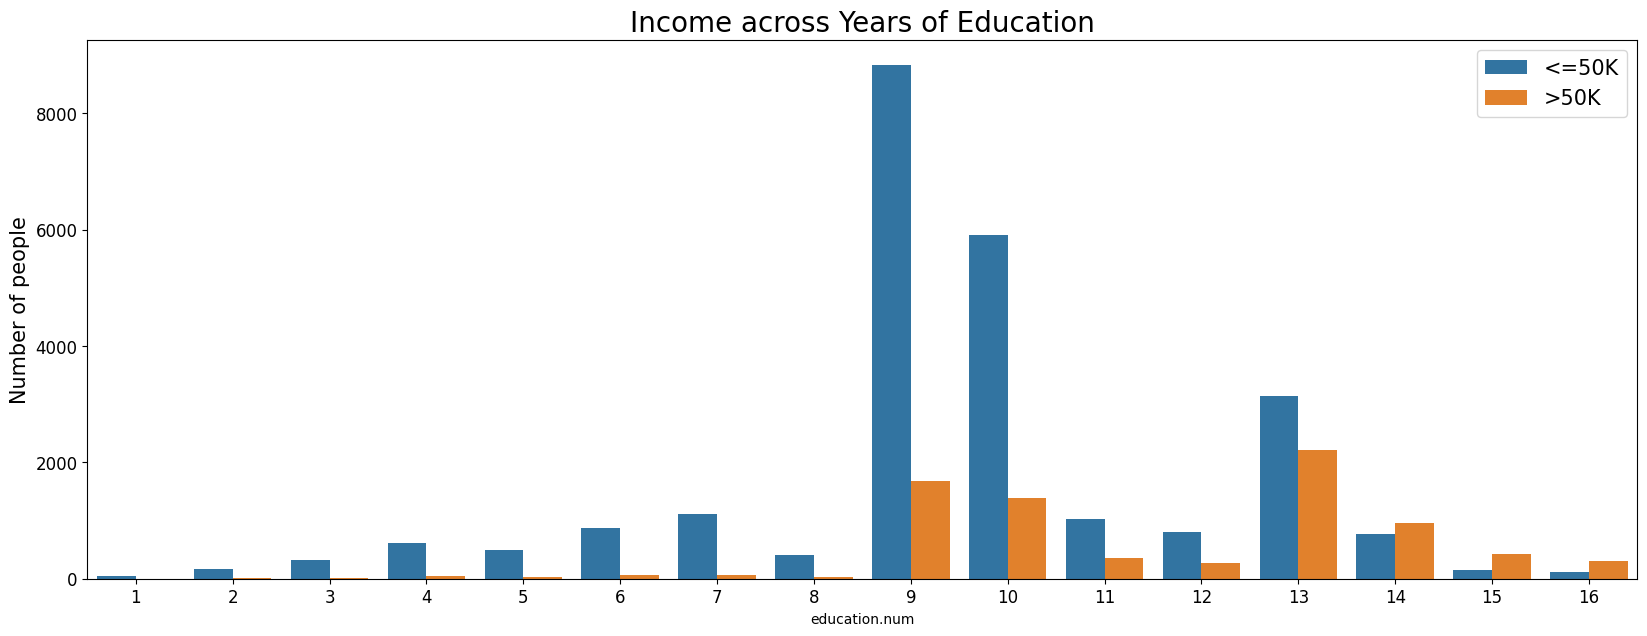

In [26]:
# countplot of income across years of education

plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['education.num'],
              hue=dataset['income'])

plt.title('Income across Years of Education', fontdict={'fontsize': 20})
plt.ylabel('Number of people', fontdict={'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

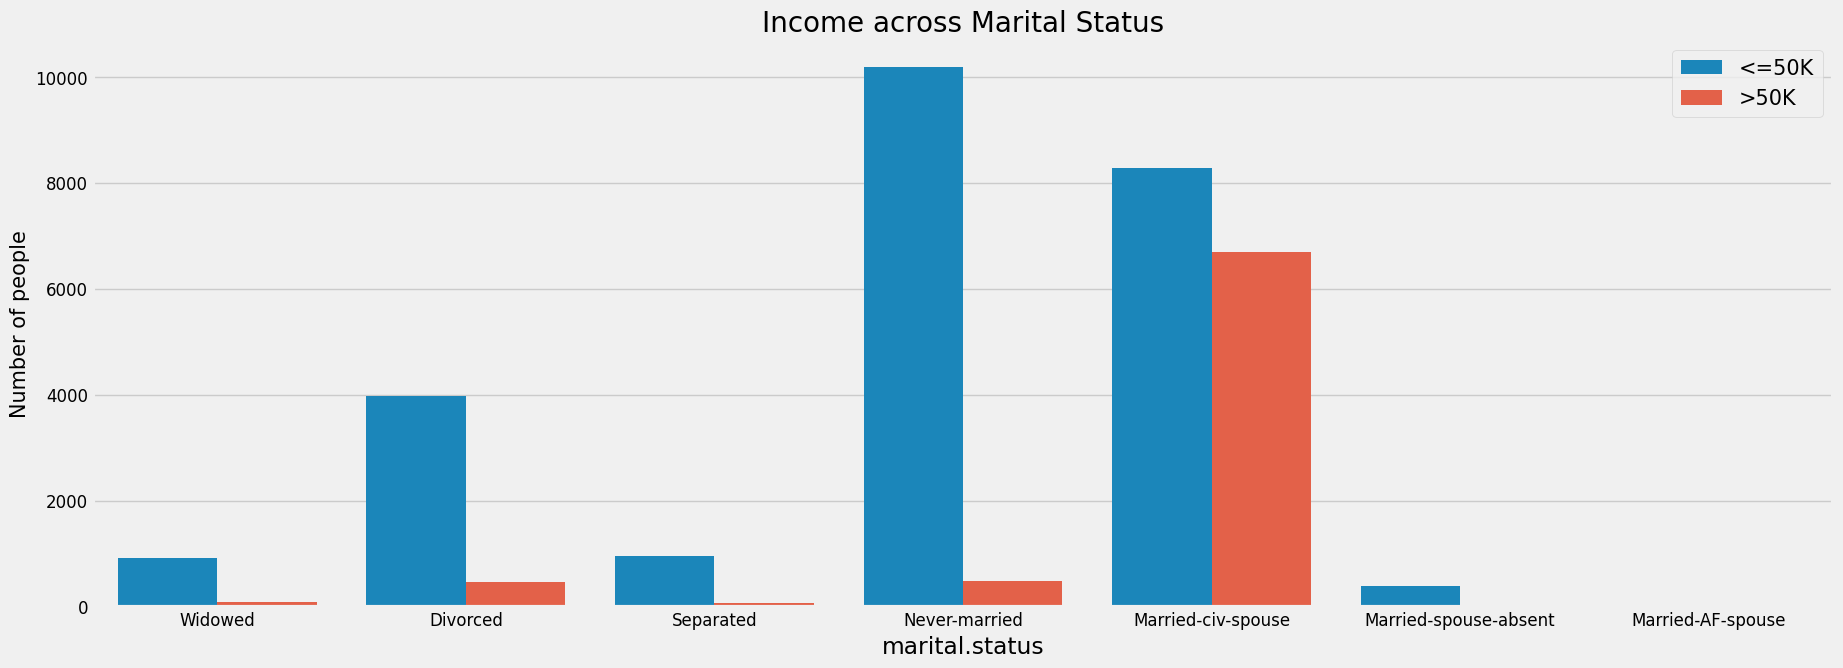

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['marital.status'], hue=dataset['income'])

plt.title('Income across Marital Status', fontdict={'fontsize': 20})
plt.ylabel('Number of people', fontdict={'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

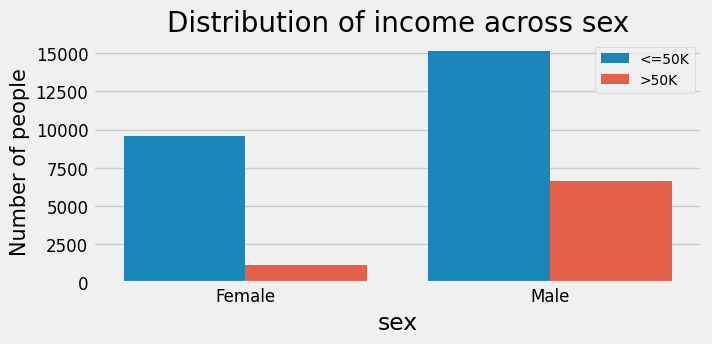

In [28]:
# countplot of income across sex

plt.figure(figsize=(7, 3))
sns.countplot(x =dataset['sex'], hue=dataset['income'])

plt.title('Distribution of income across sex', fontdict={'fontsize': 20, })
plt.ylabel('Number of people', fontdict={'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})

###  Multivariate Analysis

In [29]:
# Encoding Income in binary form '0 and 1'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
dataset['income'] = le.fit_transform(dataset['income'])

<Axes: >

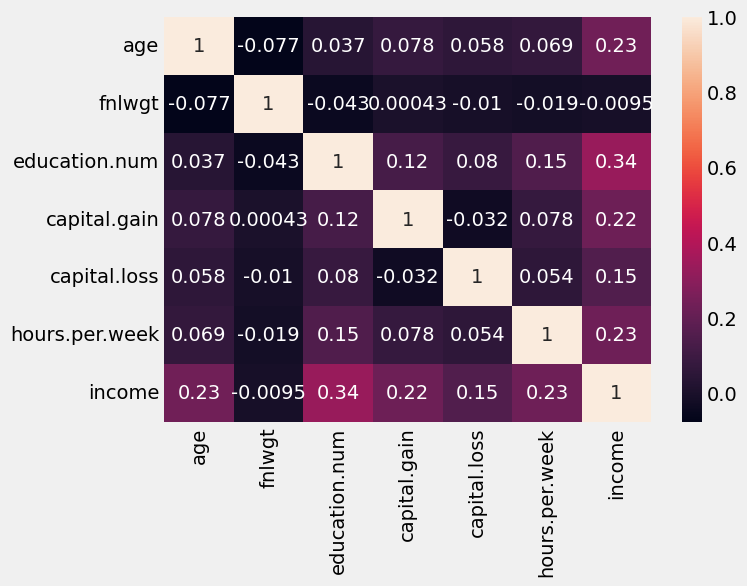

In [31]:
cor = dataset.corr()
plt.subplots(figsize=(7, 5))
sns.heatmap(cor, annot =True)


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

#Data Preprocessing and Feature Engineering

In [32]:
# Replacing '?' to 'nan'

dataset = dataset.replace('?', np.nan)

    # or



# dataset["workclass"] = [i.replace("?", str(np.nan)) for i in dataset["workclass"]]
# dataset["occupation"] = [i.replace("?", str(np.nan)) for i in dataset["occupation"]]
# dataset["native.country"] = [i.replace("?", str(np.nan)) for i in dataset["native.country"]]


In [33]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [34]:
# Checking null values
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [35]:
nan_values_columns = ['workclass', 'occupation', 'native.country']

In [36]:
for col in nan_values_columns:
    mode = dataset['workclass'].mode()[0]
    dataset[col].fillna(mode, inplace=True)

In [37]:
# Checking null values in percantege
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [38]:
dataset.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


### Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder = LabelEncoder()

In [41]:
for col in dataset.columns:
  if dataset[col].dtypes == 'object':
    dataset[col] = encoder.fit_transform(dataset[col])



In [42]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,39,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,39,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,39,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,39,0
4,41,3,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [44]:
dataset['marital.status'].value_counts()

2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital.status, dtype: int64

In [45]:
dataset['occupation'].value_counts()

10    4140
2     4099
3     4066
0     3770
12    3650
7     3295
6     2002
9     1843
14    1597
5     1370
4      994
13     928
11     649
8      149
1        9
Name: occupation, dtype: int64

In [46]:
dataset['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

<Axes: >

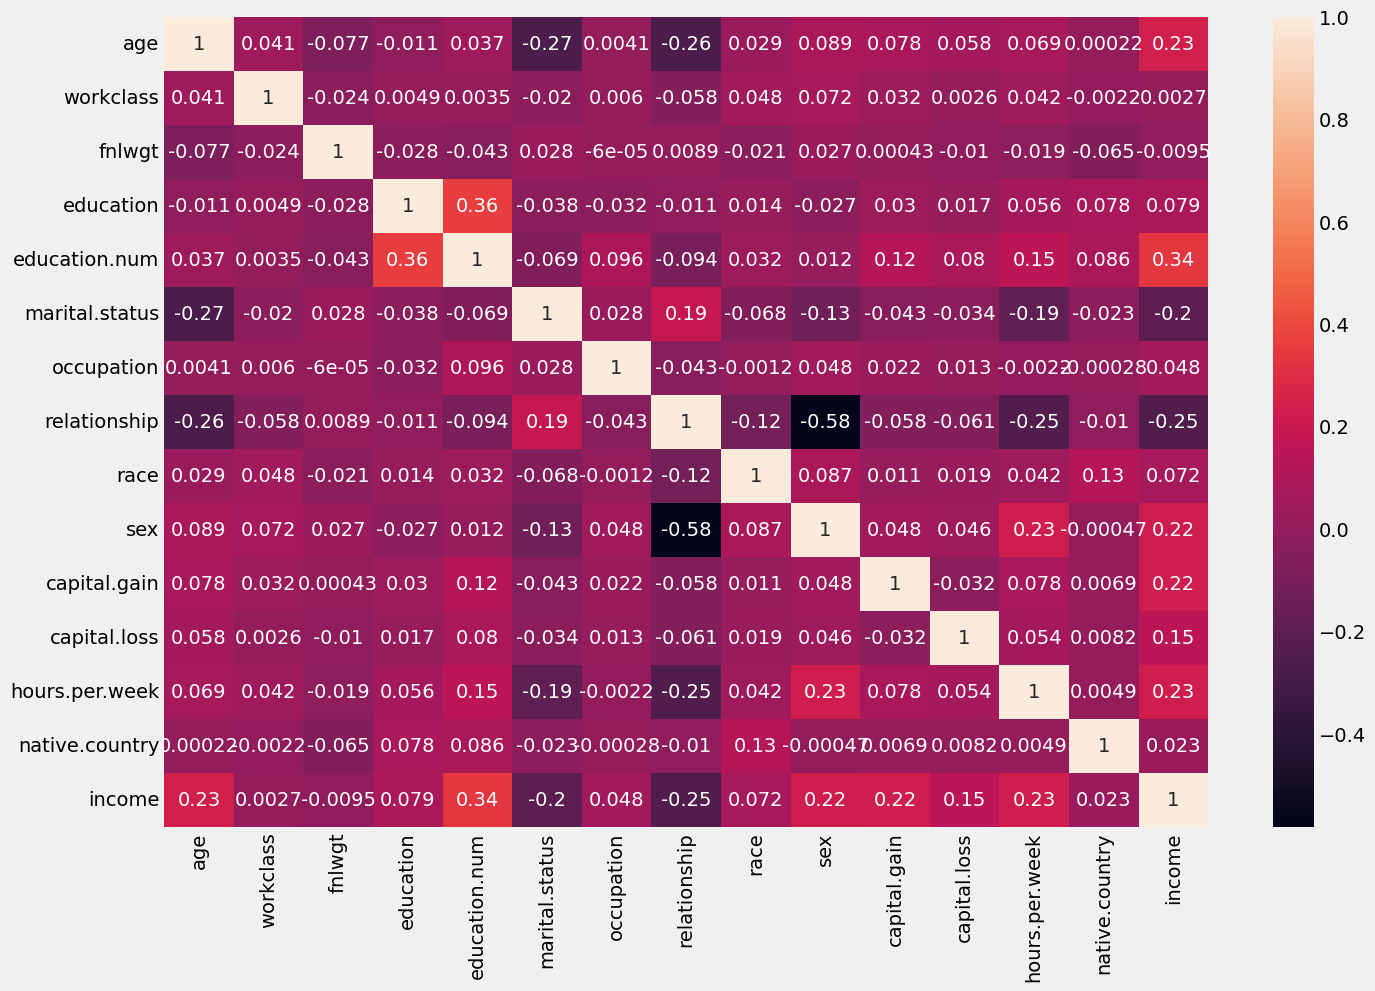

In [47]:
plt.figure(figsize = (15,10))
sns.heatmap(dataset.corr(), annot = True)

###Feature Selection

In [48]:
X = dataset.drop('income', axis = 1)
Y = dataset['income']

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [50]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [51]:
feature_imp = selector.feature_importances_

In [52]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.54
1 4.15
2 16.38
3 3.45
4 9.18
5 6.98
6 7.75
7 9.27
8 1.43
9 2.99
10 8.72
11 2.76
12 9.51
13 1.89


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [54]:
X = X.drop(['fnlwgt','workclass', 'education', 'race', 'sex','capital.gain','relationship',
            'capital.loss', 'native.country'], axis=1)


<Axes: >

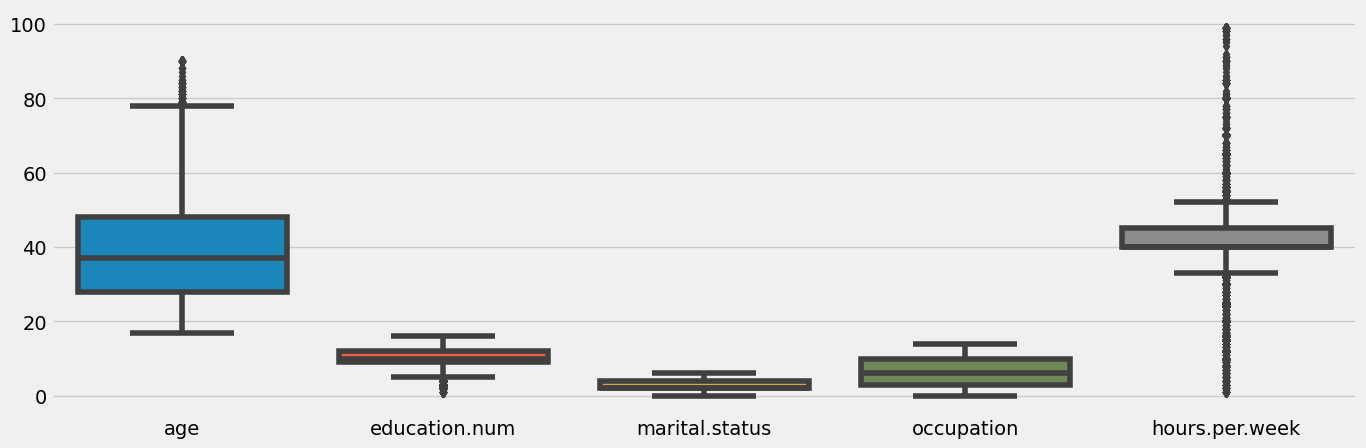

In [55]:
plt.figure(figsize = (15,5))
sns.boxplot(data = X)

###Feature scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [108]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [109]:
X.head()

,age,education.num,marital.status,occupation,hours.per.week
0,3.769612,-0.420060,2.249480,0.579413,-0.035429
1,3.183112,-0.420060,2.249480,-0.797670,-1.817204
2,2.010110,-0.031360,2.249480,0.579413,-0.035429
3,1.130359,-2.363558,-1.734058,-0.109128,-0.035429
4,0.177296,-0.031360,1.585557,0.808927,-0.035429


<Axes: >

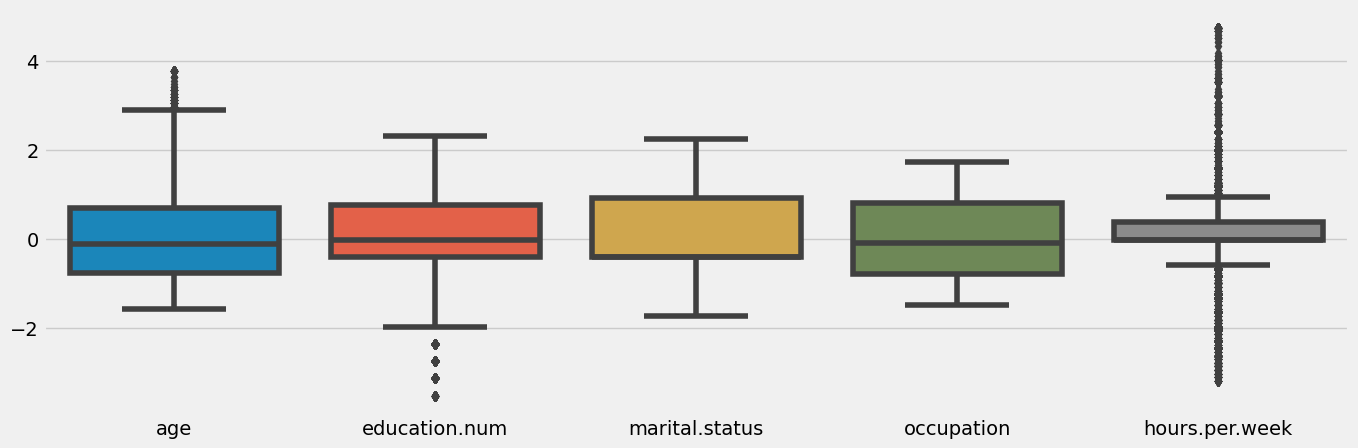

In [59]:
plt.figure(figsize = (15,5))
sns.boxplot(data = X)

###Fixing imbalanced dataset using Oversampling

In [60]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [61]:
from imblearn.over_sampling import RandomOverSampler
sample = RandomOverSampler(random_state=42)

In [62]:
sample.fit(X, Y)


RandomOverSampler(random_state=42)

In [63]:
Xresampled, Yresampled = sample.fit_resample(X, Y)

In [64]:
round(Yresampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [65]:
Xresampled

,age,education.num,marital.status,occupation,hours.per.week
0,3.769612,-0.420060,2.249480,0.579413,-0.035429
1,3.183112,-0.420060,2.249480,-0.797670,-1.817204
2,2.010110,-0.031360,2.249480,0.579413,-0.035429
3,1.130359,-2.363558,-1.734058,-0.109128,-0.035429
4,0.177296,-0.031360,1.585557,0.808927,-0.035429
...,...,...,...,...,...
49435,1.130359,1.523438,-0.406212,-1.486211,-0.035429
49436,1.276984,-0.420060,-0.406212,1.726982,-0.197409
49437,0.617171,-0.420060,-0.406212,-0.109128,0.612489
49438,1.203672,0.357340,-0.406212,-1.027183,0.774468


###Splitting Dataset Into Train and Test

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xresampled,Yresampled, test_size = 0.25, random_state = 42)

In [67]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (37080, 5)
X_test shape: (12360, 5)
Y_train shape: (37080,)
Y_test shape: (12360,)


#Data Modelling

In [68]:
from sklearn.metrics import accuracy_score

###Linear regression


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)
liner_y_predict = linreg.predict(X_test)

In [70]:

mae = mean_absolute_error(y_test, liner_y_predict)
score=r2_score(y_test, liner_y_predict)
print("mae", mae)
print("score", score)

mae 0.37553603871448904
score 0.26769632777501007


###Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [72]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_y_predict = lasso.predict(X_test)

In [73]:
mae = mean_absolute_error(y_test, lasso_y_predict)
score=r2_score(y_test, lasso_y_predict)
print("mae", mae)
print("score", score)

mae 0.5
score 0.0


###Ridge Regression


In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [75]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_y_predict = ridge.predict(X_test)

In [76]:
mae = mean_absolute_error(y_test, ridge_y_predict)
score=r2_score(y_test, ridge_y_predict)
print("mae", mae)
print("score", score)

mae 0.37553752879579183
score 0.26769643726950687


###Elasticnet Regression

In [77]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [78]:
elastic= ElasticNet()
elastic.fit(X_train, y_train)
elastic_y_predict = elastic.predict(X_test)

In [79]:
mae = mean_absolute_error(y_test, elastic_y_predict)
score=r2_score(y_test, elastic_y_predict)
print("mae", mae)
print("score", score)

mae 0.5
score 0.0


### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()


In [81]:
lg.fit(X_train, y_train)
lg.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [82]:
yLGpred = lg.predict(X_test)
yLGpred

array([0, 1, 0, ..., 0, 0, 0])

###Finding The Best K -value

In [83]:
# error = []
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt

# for i in range(1,40):
#   model = KNeighborsClassifier(n_neighbors=i)
#   model.fit(X_train, y_train)
#   pred_i = model.predict(X_test)
#   error.append(np.mean(pred_i != y_test))

# plt.figure(figsize = (12,6))
# plt.plot(range(1,40), error, color = 'red', linestyle = 'dashed', marker='o', markerfacecolor = 'blue', markersize = 10)
# plt.title('Error Rate K value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

In [84]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
YKNNpred = model.predict(X_test)

###SVM

In [86]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [87]:
svc.fit(X_train, y_train)

SVC(random_state=42)

In [88]:
YSvcPred = svc.predict(X_test)

###Naive Bayes Classifier

In [89]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [90]:
nb.fit(X_train, y_train)

GaussianNB()

In [91]:
YNBpred = nb.predict(X_test)

###Descision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [93]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [94]:
YDTpred= dec_tree.predict(X_test)

###Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [96]:
ran_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
YRFpred = ran_for.predict(X_test)
YRFpred

array([0, 0, 0, ..., 0, 1, 0])

In [98]:
y_test

32168    0
199      0
16026    0
10791    0
33656    1
        ..
30634    0
30218    1
10963    0
29408    1
14664    0
Name: income, Length: 12360, dtype: int64

#Evaluation Model

###Logistic regression:

In [99]:
print('Logistic Regression:')
print("Accuracy of the Model:{0}%".format(accuracy_score(y_test, yLGpred)*100))

Logistic Regression:
Accuracy of the Model:72.5%


###KNN:

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [101]:
print("Accuracy of the Model:{0}%".format(accuracy_score(y_test, YKNNpred)*100))

Accuracy of the Model:81.75566343042071%


###Support Vector Classifier:

In [102]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, YSvcPred) * 100, 2))
# print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 79.8


###Naive Bayes Classifier:

In [103]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, YNBpred) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 78.92


###Decision Tree Classifier:

In [104]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, YDTpred) * 100, 2))

Decision Tree Classifier:
Accuracy score: 85.59


###Random Forest classifier:

In [105]:
print('Random Forest classifier:')
print('Accuracy score:', round(accuracy_score(y_test, YRFpred) * 100, 2))

Random Forest classifier:
Accuracy score: 86.98


In [111]:
# age	education.num	marital.status	occupation	hours.per.week
age = int(input("Enter New custmer's Age: "))
eduNo = int(input("Enter Education No.: "))
MS = int(input("Enter Marittal status: "))
occupation = int(input("Enter occupation: "))
hpw = int(input("Enter work hours per week: "))

# MS = 0,1,2,3,4,5,6
# occupation = 0 to 15
# eduNo = 1 to 16

newCust = [[age,eduNo, MS ,occupation,hpw]]
result = ran_for.predict(scaler.fit_transform(newCust))
print(result)

if result == 1:
  print('Above 50k')
else:
  print('less than 50K')

Enter New custmer's Age: 60
Enter Education No.: 10
Enter Marittal status: 2
Enter occupation: 3
Enter work hours per week: 40
[0]
less than 50K


##Pickle

In [112]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(scaler,open('ran_for.pkl','wb'))